# Principal Component Analysis (PCA)

(This is a walkthrough of StatQuest's video on this topic https://www.youtube.com/watch?v=FgakZw6K1QQ)

Principal component analysis is the process of determining what variables actually have the most impact on what you are trying to measure/predict.

E.g. IQ probably has more of an impact on a school test than how many pets someone owns. (Probably)

Let's create some  data to work with:

| |Mouse 1|Mouse 2|Mouse 3|Mouse 4|Mouse 5|Mouse 6|
| --- | --- | --- | --- | --- | --- | --- |
|Gene 1|10|11|8|3|2|1|
|Gene 2|6|4|5|3|2.8|1|

   gene1  gene2
0     10    6.0
1     11    4.0
2      8    5.0
3      3    3.0
4      2    2.8
5      1    1.0


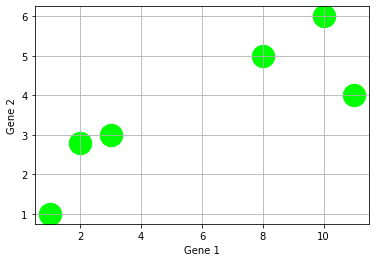

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

df = pd.DataFrame()
gene1 = pd.Series([10,11,8,3,2,1])
gene2 = pd.Series([6,4,5,3,2.8,1])
#df = pd.DataFrame(gene1, gene2,columns=["gene1","gene2"])
df["gene1"] = gene1
df["gene2"] = gene2
print(df)

plt.scatter(df.gene1, df.gene2, color="lime", s=500)
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")
plt.grid()

Immediately, we can see that the data falls into seperate clusters, we could eyeball which gene is more impactful in causing the seperation, but for anything even slightly complex we will need a mathematical method for determining this.

Enter: PCA

First, we'll shift the data so that it's centered around the origin.
We do this by:
1) Finding the average value for gene 1 (5.83)
2) Finding the average value for gene 2 (3.63)
3) Combine these values to locate the centre of the data (5.83 , 3.63)
4) Move each datapoint by this value
E.g. (5,5) would become (-0.83, 1.36)

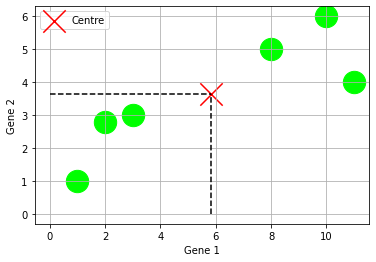

In [5]:
plt.scatter(df.gene1.mean(), df.gene2.mean(), marker="x", color="red", s=500, label="Centre")
plt.scatter(df.gene1, df.gene2, color="lime", s=500)
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")
plt.plot([df.gene1.mean(), df.gene1.mean()],[0,df.gene2.mean()], linestyle="--", color="black")
plt.plot([0, df.gene1.mean()],[df.gene2.mean(),df.gene2.mean()], linestyle="--", color="black")
plt.grid()
plt.legend()


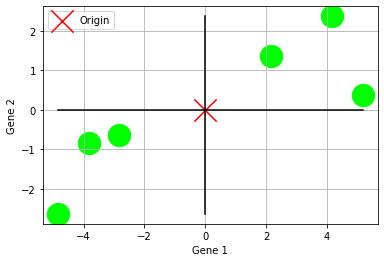

In [6]:
pca = df
pca.gene1 = pca.gene1 - pca.gene1.mean()
pca.gene2 = pca.gene2 - pca.gene2.mean()
plt.scatter(pca.gene1, pca.gene2, color="lime", s=500)
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")
plt.plot([pca.gene1.min(), pca.gene1.max()],[0,0], color="black")
plt.plot([0,0],[pca.gene2.min(), pca.gene2.max()], color="black")
plt.scatter(0,0, marker="x", color="red", s=500, label="Origin")
plt.legend()
plt.grid()

Our data still has the same relations to each other, all we've done is move the origin.

Next is to plot a line of best fit.
We do this by:
1) Plotting a random line
2) See how good it is
3) Plotting a new one
4) Keep doing this till we find the best one



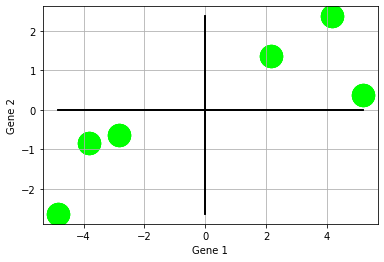

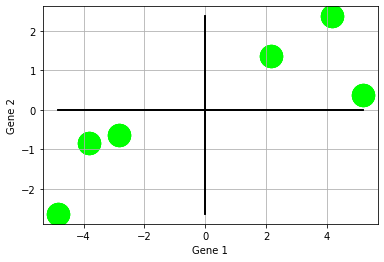

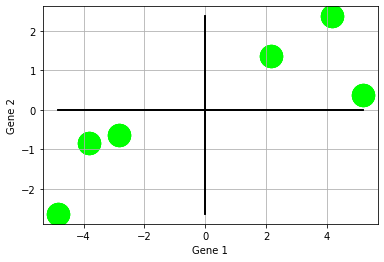

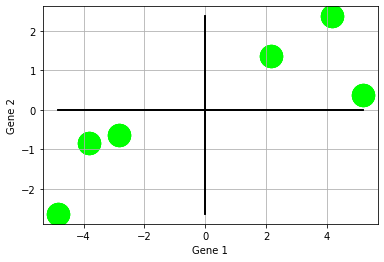

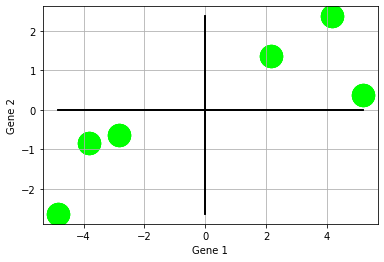

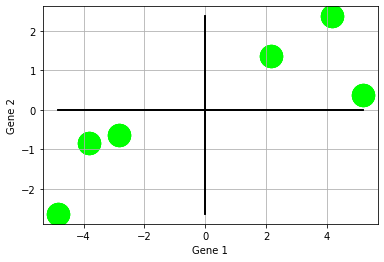

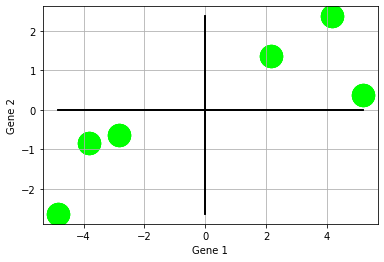

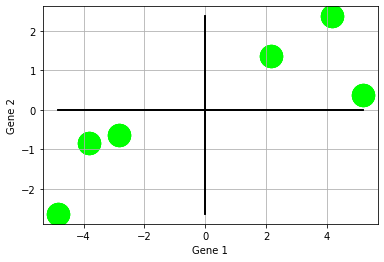

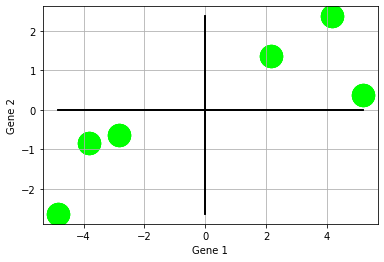

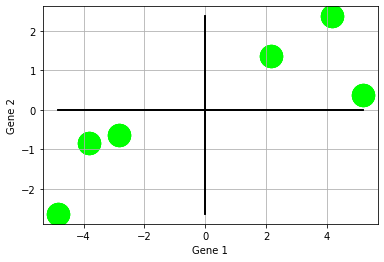

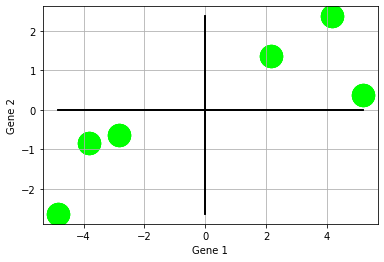

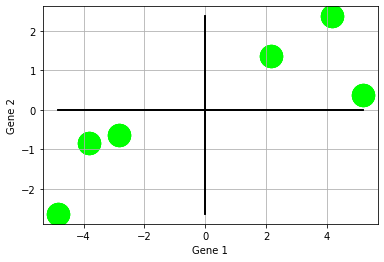

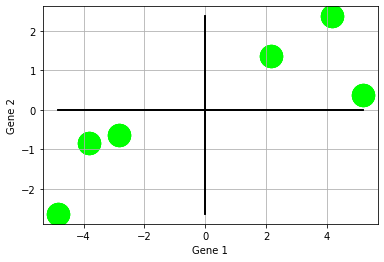

IntSlider(value=100, description='Angle of line:')

In [11]:
from IPython.display import clear_output


slider = widgets.IntSlider(
    value=100,
    min=0,
    max=100,
    step=1,
    description='Angle of line:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)



def draw_graph():
    plt.scatter(pca.gene1, pca.gene2, color="lime", s=500)
    plt.xlabel("Gene 1")
    plt.ylabel("Gene 2")
    plt.plot([pca.gene1.min(), pca.gene1.max()],[0,0], color="black")
    plt.plot([0,0],[pca.gene2.min(), pca.gene2.max()], color="black")
    plt.grid()
    slider

def changeable_line(slider_value):
    #clear_output(wait=True)
    draw_graph()
    
    slider_value = slider.value
    ratio_x = slider.value/100
    ratio_y = 1-(slider.value/100)
    length = 10
    x = ratio_x * length
    y = ratio_y * length
    
    plt.plot([x,-x],[y,-y], color="red")
    

changeable_line
slider.observe(changeable_line)
slider 